IMPORTING LIBRARIES

In [131]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt 
import seaborn as sns

READING DATA

In [132]:
df=pd.read_csv("ForestFireDataset.csv")

DEFINING FEATURES AND LABELS

In [133]:
Oxy=np.array((df['Oxygen'].values).reshape(-1,1))
Temp=np.array((df['Temperature'].values).reshape(-1,1))
Hum=np.array((df['Humidity'].values).reshape(-1,1))

In [134]:
Features = np.concatenate((Temp,Hum),axis=1)

In [135]:
Class = np.array((df["Fire Occurrence"].values).reshape(-1,1))

TRAINING MODEL

In [136]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(Features, Class, test_size=0.5, random_state=42)

In [137]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)

c:\Users\patid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

TESTING MODEL

In [138]:
y_pred = svm_model.predict(x_test)

In [139]:
from sklearn.metrics import classification_report as cr
print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        56
           1       0.95      0.90      0.92        61

    accuracy                           0.92       117
   macro avg       0.92      0.92      0.92       117
weighted avg       0.92      0.92      0.92       117



[Text(0, 0.5, 'No Fire'), Text(0, 1.5, 'Fire')]

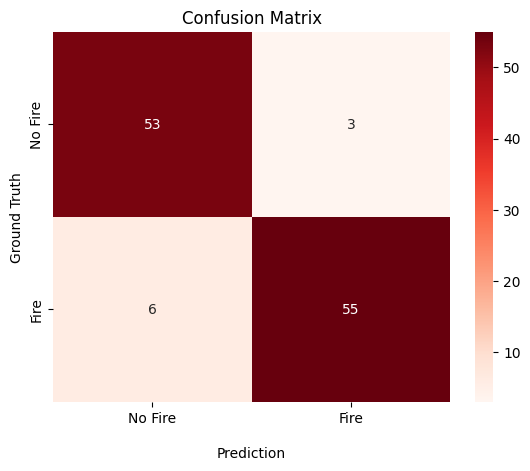

In [140]:
from sklearn.metrics import confusion_matrix as cm
confusion_matrix = cm(y_test,y_pred)
ax = sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap='Reds')
ax.set_title("Confusion Matrix");
ax.set_xlabel('\nPrediction')
ax.set_ylabel('Ground Truth');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No Fire','Fire'])
ax.yaxis.set_ticklabels(['No Fire','Fire'])

In [141]:
from sklearn.metrics import jaccard_score as js
print(js(y_test,y_pred))

0.859375


PREDICTING CUSTOM VALUES

In [142]:
Tempi=int(input("Enter Temperature : "))
Humi=int(input("Enter Humidity : "))
pred=svm_model.predict([[Tempi,Humi]])
if pred == 0:
    print("No Fire")
else:
    print("Fire")

Fire
